In [1]:
BASE_DIR = "newdata/data_excel_finalmatrix_modified/"
files = []
import os
for file in os.listdir(BASE_DIR):
    files.append(file)

In [2]:
import pandas as pd
import numpy as np
global_ct = 0

In [3]:
flname = "shashi5.xlsx"
data = pd.read_excel(BASE_DIR + flname)
global_ct += 1

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
filtered_data = np.array(data)
fil_data = []
for x in filtered_data:
    if x[1] !=0:
        fil_data.append((x[1],x[-1]))
filtered_data = np.array(fil_data)
filtered_data

array([[   17,  3642],
       [    8,  3835],
       [    2,  4012],
       [    1,  4130],
       [    2,  4247],
       [    2,  4396],
       [    1,  4455],
       [    2,  5032],
       [    1,  5951],
       [    1,  6010],
       [    6,  6515],
       [    8,  7311],
       [    6,  7399],
       [    6,  7755],
       [    6,  8053],
       [    6,  8084],
       [   10,  9139],
       [   19,  9249],
       [    6,  9298],
       [    7,  9349],
       [    6,  9462],
       [    6,  9522],
       [    6,  9701],
       [    6, 10446],
       [    6, 10534],
       [    8, 10680],
       [    8, 10768],
       [    8, 10798],
       [    8, 10857],
       [    6, 10946],
       [    8, 11036],
       [    8, 11929],
       [    8, 12049],
       [    6, 12230],
       [    7, 12261],
       [    7, 12293],
       [    7, 12672],
       [    7, 12743],
       [    8, 12803],
       [    7, 12834],
       [    8, 12865],
       [   10, 12987],
       [   10, 14477],
       [   

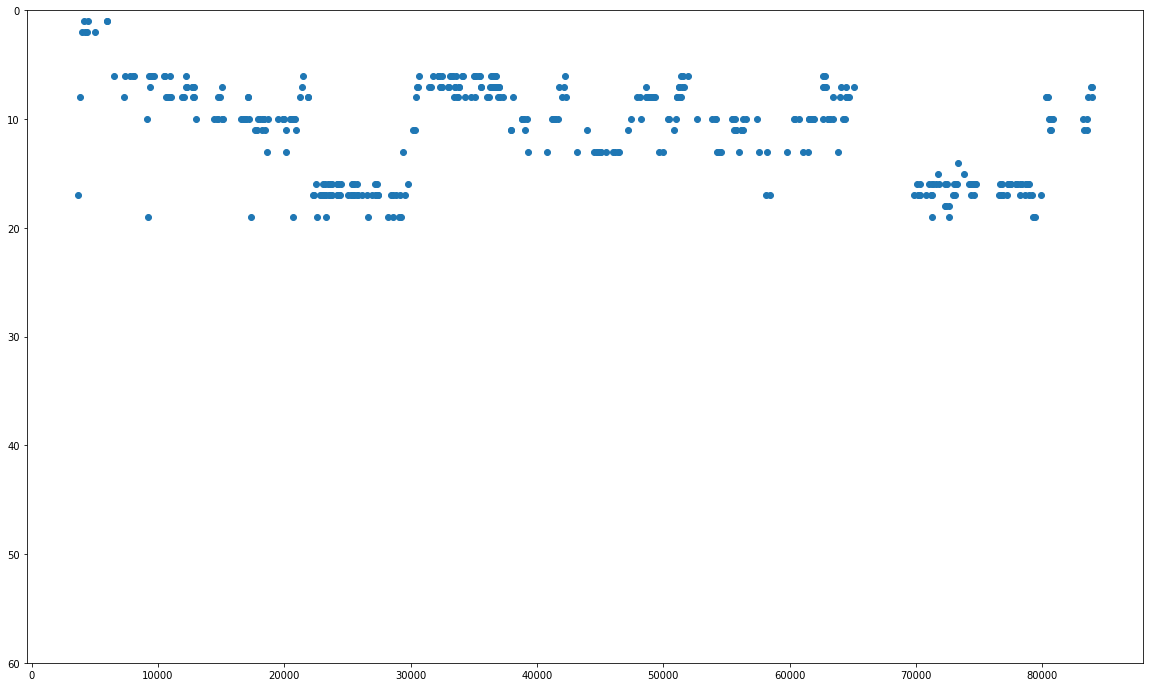

In [37]:
plt.figure(figsize=(20,12))
plt.scatter(filtered_data[:,1],filtered_data[:,0])
plt.ylim(60,0)
plt.savefig('plts/{}.png'.format(flname))

In [10]:
PREVIOUS_PTS_TO_SEE = 5
THRESHOLD = 0.35
TIME_MIN = 1e5
TIME_MAX = 2e5
LINE_SKIP_THRESH = 0.2

In [11]:
def get_going_back_time(data):
    max_line = np.max(data[:,0])
    #print(max_line)
    ln = len(data)
    ct = 0
    pts = []
    tmin = 0
    hasReached = False
    for i in range(1,ln):
        for j in range(PREVIOUS_PTS_TO_SEE):
            if abs(data[i-j-1,0]-max_line)<=LINE_SKIP_THRESH*max_line:
                hasReached = True
            if i-1-j >=0 and data[i-1-j,0] - data[i,0] >= THRESHOLD*max_line:
                if data[i,1] >= TIME_MIN and data[i,1] <= TIME_MAX\
                and hasReached:
                    print(data[i], data[i-1-j])
                    ct += 1
                    if ct == 1:
                        tmin = data[i-1-j,1]
                    break
                
                '''
                if(ct==1):
                    lmin = data[i,0]
                    tmin = data[i,1]
                else :
                    if data[i,0] < lmin:
                        lmin = data[i,0]
                        tmin = data[i,1]
                '''
                    
                #break
    #print(ct,lmin,tmin)
    return ct,tmin

In [12]:
def before_grad_increase(data,time):
    ct = 0
    while data[ct,1] != time: 
        ct+=1
    for i in range(ct-5):
        flag = False
        for j in range(5):
            if data[i+j,0] - data[i,0] < 5:
                #print(data[i+j],data[i])
                flag = True
        if not flag:
            return False

    
    return True

In [13]:

def find_behaviour(filename):
    print(filename)
    data = pd.read_excel(filename)
    filtered_data = np.array(data)
    fil_data = []
    for x in filtered_data:
        if x[1] !=0:
            fil_data.append((x[1],x[-1]))
    filtered_data = np.array(fil_data)
    
    beh =  get_going_back_time(filtered_data)
    return beh
    if beh[0] == 0:
        return 0
    if before_grad_increase(filtered_data,beh[1]):
        return beh[0]
    return beh[1]

    return beh
    '''
    myval = False
    if beh[0] != 0:
        myval = after_grad_increase(filtered_data,beh[2])
    return (beh,myval)
    '''

In [14]:
cts = []
for file in os.listdir(BASE_DIR):
    filename = BASE_DIR + file
    try:
        cts.append((filename,find_behaviour(filename)))
    except Exception as e:
        print(filename, e)

newdata/data_excel_finalmatrix_modified/Anjali32.xlsx
newdata/data_excel_finalmatrix_modified/haque_34_fm.xlsx
newdata/data_excel_finalmatrix_modified/20_arka_fm.xlsx
[    37 141935] [    64 140804]
[     3 143116] [    37 143052]
[     3 143147] [    37 143052]
[     5 143179] [    37 143052]
[     5 143211] [    37 143052]
[     6 143243] [    37 143052]
newdata/data_excel_finalmatrix_modified/anuraag_1_fm.xlsx
newdata/data_excel_finalmatrix_modified/anshul_40_fm.xlsx
newdata/data_excel_finalmatrix_modified/vrajesh_20.xlsx
[    28 172275] [    55 158992]
[    28 172319] [    55 158992]
[    27 172364] [    55 158992]
[    30 172515] [    55 158992]
newdata/data_excel_finalmatrix_modified/sweta_40_fm.xlsx
newdata/data_excel_finalmatrix_modified/sweta_26_fm.xlsx
[    14 132740] [    31 127754]
[    14 132829] [    31 127754]
[    16 132866] [    31 127754]
[    15 132900] [    31 127754]
[    15 132942] [    31 127754]
[    14 147317] [    30 146980]
newdata/data_excel_finalmatrix_modi

KeyboardInterrupt: 

In [96]:
print("All files that the model identifies as Type 7")
for x in cts:
    if x[1][0] > 0:
        print(x)

All files that the model identifies as Type 7
('newdata/data_excel_finalmatrix_modified/20_arka_fm.xlsx', (2, 142832))
('newdata/data_excel_finalmatrix_modified/vrajesh_20.xlsx', (3, 156387))
('newdata/data_excel_finalmatrix_modified/fm_vamsi_21.xlsx', (7, 121038))
('newdata/data_excel_finalmatrix_modified/fm_vamsi_32.xlsx', (6, 108406))
('newdata/data_excel_finalmatrix_modified/mayur_32.xlsx', (9, 99973))
('newdata/data_excel_finalmatrix_modified/fm_atrayee_16.xlsx', (6, 103195))
('newdata/data_excel_finalmatrix_modified/depeesh_35_fm.xlsx', (109, 100066))
('newdata/data_excel_finalmatrix_modified/anjali_38_fm.xlsx', (5, 180228))
('newdata/data_excel_finalmatrix_modified/fm_Arpit_33.xlsx', (9, 173235))
('newdata/data_excel_finalmatrix_modified/mayur_21.xlsx', (8, 108981))
('newdata/data_excel_finalmatrix_modified/fm_sweta_34.xlsx', (1, 195241))
('newdata/data_excel_finalmatrix_modified/nikhil_10.xlsx', (10, 115853))
('newdata/data_excel_finalmatrix_modified/shweta32.xlsx', (4, 129066)

In [18]:
for x in cts:
    if x[1] == 0:
        print(x)

('newdata/data_excel_finalmatrix_modified/Anjali32.xlsx', 0)
('newdata/data_excel_finalmatrix_modified/haque_34_fm.xlsx', 0)
('newdata/data_excel_finalmatrix_modified/20_arka_fm.xlsx', 0)
('newdata/data_excel_finalmatrix_modified/anuraag_1_fm.xlsx', 0)
('newdata/data_excel_finalmatrix_modified/anshul_40_fm.xlsx', 0)
('newdata/data_excel_finalmatrix_modified/sweta_40_fm.xlsx', 0)
('newdata/data_excel_finalmatrix_modified/sweta_26_fm.xlsx', 0)
('newdata/data_excel_finalmatrix_modified/fm_reddy_20.xlsx', 0)
('newdata/data_excel_finalmatrix_modified/fm_vamsi_21.xlsx', 0)
('newdata/data_excel_finalmatrix_modified/fm_sudhir_21.xlsx', 0)
('newdata/data_excel_finalmatrix_modified/fm_haque_34.xlsx', 0)
('newdata/data_excel_finalmatrix_modified/fm_reddy_39.xlsx', 0)
('newdata/data_excel_finalmatrix_modified/fm_Arihant_23.xlsx', 0)
('newdata/data_excel_finalmatrix_modified/anshul_2_fm.xlsx', 0)
('newdata/data_excel_finalmatrix_modified/shashi5.xlsx', 0)
('newdata/data_excel_finalmatrix_modified/a

In [15]:
find_behaviour(BASE_DIR + "3_arka_fm.xlsx")

newdata/data_excel_finalmatrix_modified/3_arka_fm.xlsx
[    34 100054] [   60 97617]
[    34 100098] [   60 97617]
[    34 100135] [   60 97617]


(3, 97617)